論文などを書くときにカラーバーを書くことは必須であるが、```matplotlib```ではしばしば面倒なことがある。
ここにその方法をメモする。

パネルが一つの時は、```pcolormesh```での返り値を```im```などとして、```plt.colorbar(im)```とするのみで良い。

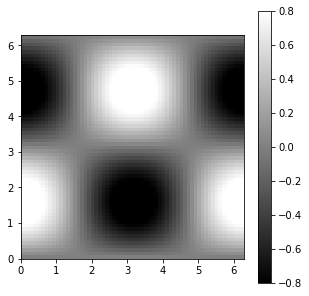

In [1]:
#Jupyter notebookのための設定
%matplotlib inline

#ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt

#座標の設定
x = np.linspace(0,2*np.pi,64)
y = np.linspace(0,2*np.pi,64)
Y, X = np.meshgrid(y,x)

#表示する値の設定
qq = sin(X)*cos(Y)

#描画の設定
fig = plt.figure(num=0,figsize=(5,5))
ax = fig.add_subplot(111,aspect='equal')

im = ax.pcolormesh(x,y,qq,vmin=-0.8,vmax=0.8)
plt.colorbar(im)

二つ以上のパネルがある時は、```mpl_toolkit```を使う。

```make_axes_locatable```でそれぞれのAxesを分けるインスタンスを作成(```AxesDivider```)

```div.new_horizontal```で一つのAxesの中で水平方向に分ける。sizeで分けた物のサイズ、padで元からあるAxesとの間の空白のサイズを決める。

```new_horizontal```で

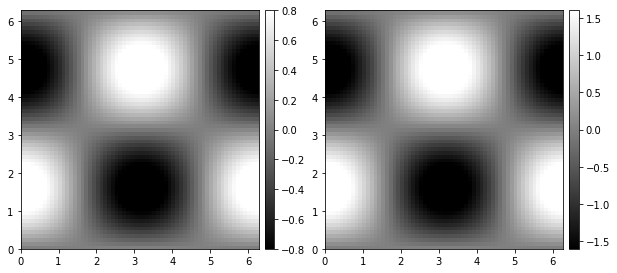

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#新しい値の設定
gg = 2*qq

#描画の設定
fig = plt.figure(num=0,figsize=(10,5))
ax1 = fig.add_subplot(121,aspect='equal')
ax2 = fig.add_subplot(122,aspect='equal')

im1 = ax1.pcolormesh(x,y,qq,vmin=-0.8,vmax=0.8)
im2 = ax2.pcolormesh(x,y,gg,vmin=-1.6,vmax=1.6)

div1 = make_axes_locatable(ax1)
div2 = make_axes_locatable(ax2)

cax1 = div1.new_horizontal(size='4%',pad=0.08)
cax2 = div2.new_horizontal(size='4%',pad=0.08)

fig.add_axes(cax1)
fig.add_axes(cax2)

fig.colorbar(im1,cax=cax1)
fig.colorbar(im2,cax=cax2)

パネルが4枚程度あって、一つのカラーバーを共有したい時は、`figure.subplots_adjust`を使う。
これは元々あるfigure全体を調整・縮小などしてくれる。パラメタはそれぞれ
- hspace: サブプロット間のスペースのために予約されている高さ
- wspace:サブプロット間のスペースのために予約されている幅
- top:元々あるスペースの上境界
- bottom:元々あるスペースの下境界
- right:元々あるスペースの右境界
- left: 元々あるスペースの左境界

このあと、空いたスペースに`figure.add_axes`で新しくカラーバーのためにaxesを追加。

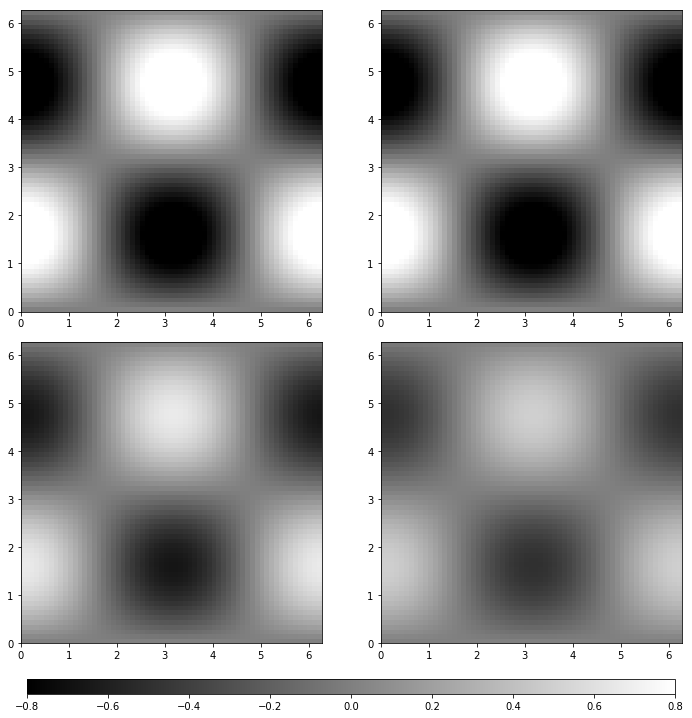

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#新しい値の設定
qq1 = qq
qq2 = qq*2
qq3 = qq*3
qq4 = qq*4

#描画の設定
fig = plt.figure(num=0,figsize=(10,10))
ax1 = fig.add_subplot(221,aspect='equal')
ax2 = fig.add_subplot(222,aspect='equal')
ax3 = fig.add_subplot(223,aspect='equal')
ax4 = fig.add_subplot(224,aspect='equal')

im1 = ax1.pcolormesh(x,y,qq1,vmin=-0.8,vmax=0.8)
ax2.pcolormesh(x,y,qq2,vmin=-1.6,vmax=1.6)
ax3.pcolormesh(x,y,qq2,vmin=-2.4,vmax=2.4)
ax4.pcolormesh(x,y,qq2,vmin=-3.2,vmax=3.2)

fig.subplots_adjust(hspace=0.1,wspace=0,top=1,bottom=0.12,right=1,left=0.)
cbar_ax = fig.add_axes([0.05,0.05,0.9,0.02])
fig.colorbar(im1,cax=cbar_ax,orientation='horizontal')